#  <p style="text-align: center;">Практическое задание к Семинару 8.<br><br>Урок 8. Корреляционный анализ.</p>

In [1]:
import numpy as np
import statistics as st
import scipy.stats as stats
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Коэффициент **ковариации**<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle cov_{X,Y}=M(XY)-M(X)\cdot M(Y)$ (1)</b></font></div>

**Коэффициент корреляции Пирсона**<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle r_{X,Y}=\frac{cov_{X,Y}}{\sigma_X\cdot\sigma_Y}$ (2)</b></font></div>

**Критерий Стьюдента (t)**
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$t_н=\frac{\bar X-\mu_0}{\sigma_н\sqrt n}$ (3)</b></font></div>


**Таблица 1. Таблица Стьюдента**

![Student Table](https://fsd.multiurok.ru/viewImage.php?image=http://nice-diplom.ru/templates/blue/images/img/form_69.gif)

**Z-критерий**
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle\bar X\pm z_{\alpha/2}\cdot\frac{\sigma}{\sqrt n}$, (1) </b></font></div>где: <b>X</b> - среднее значение выборки, $z_{\alpha/2}$ табличное значение <b>Z</b>-критерия, 
$\sigma$-среднее квадратическое отклонение генеральной совокупности, <b>n</b> - объем выборки

**Таблица 2. Z Таблица (отрицательные значения)**

![Negative Z Table](https://www.ztable.net/wp-content/uploads/2018/11/negativeztable.png)

In [2]:
def sigma(array, offset=True):
    mean_array=np.mean(array)
    summa_mean_array=(array-mean_array)**2
    rezult=(sum(summa_mean_array)/len(array) if offset else sum(summa_mean_array)/(len(array)-1))**0.5 
    return rezult 

In [3]:
def t_interval (array, alpha):
    array_mean = np.mean(array)
    D = np.var(array, ddof=1)
    t = stats.t.ppf(1-alpha/2, len(array) - 1) # Также можно найти по Таблице 1
    print (f'[{array_mean - t * np.sqrt(D/len(array))}, {array_mean + t * np.sqrt(D/len(array))}]')

In [4]:
def Z_interval (X_mean, alpha, sigma, n):
    Z_table = stats.norm.ppf(1-alpha/2) # Также можно найти по Таблице 2
    print (f'[{X_mean - (Z_table*(sigma/(n**0.5)))}, {X_mean + (Z_table*(sigma/(n**0.5)))}]')

## ЗАДАНИЕ 1. 
***Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):***
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
***Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.***

**<p style="text-align: center;">
    <font size=10 color=#32CD32><b>-------------------------------</b></font><br>
    <font size=4.5 color=#3ac444>РЕШЕНИЕ:</font><br>
<font size=10 color=#32CD32><b>-------------------------------</b></font></p>**

In [5]:
# Дано 
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

**Постоим график и проанализируем наличие возможной зависимость.**

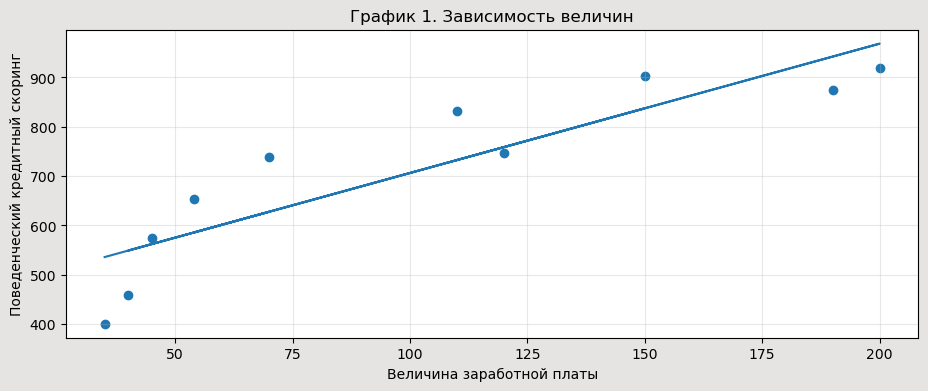

In [6]:
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.title('График 1. Зависимость величин')
plt.grid(color='#B5B8B1', alpha=0.30)
z = np.polyfit (zp, ks, 1 )
p = np.poly1d (z)
plt.plot (zp, p(zp))
plt.show()

По графику 1, можно отметить положительную линию тренда, что свидетельствует о прямой линейной зависимости.

### Коффициент ковариация (смещенная)

In [7]:
cov = np.mean(zp*ks) - np.mean(zp) * np.mean(ks) # ковариация (смещенная)   (np.mean(zp) = sum(zp)/len(zp))
cov

9157.839999999997

***Проверим полученный результат с помощью библиотеки numpy***

In [8]:
np.cov (zp,ks, ddof = 0) # смещенная ковариация

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

### Коффициент ковариация (несмещенная)

In [9]:
np.cov (zp,ks) # несмещенная ковариация

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

In [10]:
pirson_1 = cov/(sigma (zp) * sigma (ks)) # смещенная ковариация
print(f'Коэффициент корреляции r = {pirson_1: .6f}')

Коэффициент корреляции r =  0.887490


In [11]:
pirson_2 = np.cov (zp,ks)/(sigma (zp, offset=False) * sigma (ks, offset=False)) # смещенная ковариация
print(f'Коэффициент корреляции r = {pirson_2}')

Коэффициент корреляции r = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


***Проверим полученный результат с помощью функции corrcoef библиотеки numpy:***

In [12]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

***Проверим полученный результат с помощью функции corr библиотеки pandas***

In [13]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [14]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


Как и предполагалось из графика, существует сильная линейная взаимосвязь между исходными данными.

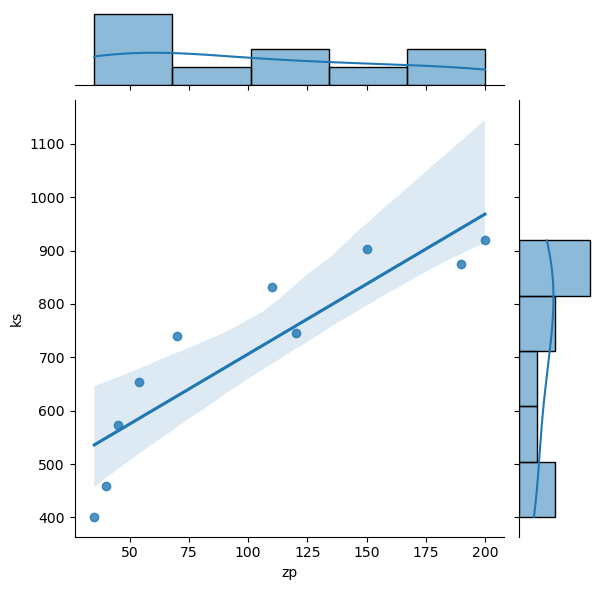

In [15]:
sns.jointplot(x=df['zp'], y=df['ks'], kind='reg');

<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Коэффициент корреляции <b>r =  0.887490</b>, что свидетельствует о <b>СИЛЬНОЙ линейной зависимости</b>. Данную зависимость подтверждает и график 1.</font></div>

---

## ЗАДАНИЕ 2. 
***Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:***
```
131, 125, 115, 122, 131, 115, 107, 99, 125, 111
```
***Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.***

**<p style="text-align: center;">
    <font size=10 color=#32CD32><b>-------------------------------</b></font><br>
    <font size=4.5 color=#3ac444>РЕШЕНИЕ:</font><br>
<font size=10 color=#32CD32><b>-------------------------------</b></font></p>**

Т.к., из условия задачи нам НЕ известно мат. ожидании генеральной совокупности, СКО для генеральной совокупности, то для расчета $95\%$-го доверительного интервала будем использовать $t$-критерий и формулу (3).

In [16]:
# Дано
data = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
data_mean = np.mean(data)
doverie = 0.95
alpha = 1 - doverie
n = len(data)
sv = n - 1
print(f'Среднее по выборке: {data_mean: .4f},\n'
      f'Размер выборки => n={n},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {np.std(data, ddof=1): .4f},\n'
      f'Число степеней свободы: {sv},\n'
      f'Вероятность =>  p = {alpha/2+doverie},\n'
      f'Табличное значение коэффициента Стьюдента (таблица 1) => t = 2.262.'
     )

Среднее по выборке:  118.1000,
Размер выборки => n=10,
Среднее квадратическое отклонение по выборке(несмещенное):  10.5457,
Число степеней свободы: 9,
Вероятность =>  p = 0.975,
Табличное значение коэффициента Стьюдента (таблица 1) => t = 2.262.


Проверим найденное значение коэффициента Стьюдента, с помощью бибилотеки scipy.stats

In [17]:
stats.t.ppf(1-alpha/2, sv)

2.2621571627409915

***Проверим с помощью библиотеки scipy.stats***

In [18]:
t_interval (data, alpha)

[110.55608365158724, 125.64391634841274]


Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111
Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.
95%-й доверительный интервал для истинного значения IQ: (110.556, 125.644).

<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Доверительный интервал для математического ожидания с надежностью 0.95 для истинного значения IQ студентов, обучающихся в местных технических вузах: <b>[110.5561, 125.6439].</b></font></div>

---

## ЗАДАНИЕ 3. 
***Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.***

Т.к., из условия задачи нам известно среднее квадратическое отклонение генеральной совокупности $\sigma=5$, то для расчета $95\%$-го доверительного интервала, будем использовать $Z$-критерий. Границы доверительного интервала расчитаем по формуле (1) и будет равен:<br>
Левая граница: $174.2-1.96\cdot\frac{5}{\sqrt 27}$<br>
Правая граница: $174.2+1.96\cdot\frac{5}{\sqrt 27}$

In [19]:
# Дано
sigma = 5
alpha = 0.05
M = 174.2
n = 27
table_x = 1.96 # определили по таблице 2 (alpha/2 = 0.0250)
left_border = M - table_x*(sigma/(n**0.5))
right_border = M + table_x*(sigma/(n**0.5))
[left_border, right_border]

[172.31398912064722, 176.08601087935276]

***Проверим с помощью библиотеки scipy.stats***

In [21]:
Z_interval (M, alpha, sigma, n)

[172.3140237765397, 176.08597622346028]


<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Доверительный интервал для математического ожидания с надежностью 0.95 для истинного значения роста футболистов в сборной: <b>[172.3140, 176.0860].</b></font></div>